## Example - Solving a regression task using QSVR with a Fidelity Quantum Kernel (FQK)

This notebook demonstrates how to ...

- generate a simple train-/test data set for solving a regression task
- defining a FQK based on the quantum embedding kernel (QEK) feature map 
    * trainable parameters of feature map are sampled randoml
    * data are encoded redundantly
- do the computation with qasm simulator
- solve regression task with QSVR

In [3]:
# necessary python and squlearn imports
import numpy as np
import matplotlib.pyplot as plt

from squlearn.feature_map import QEKFeatureMap
from squlearn.kernel.matrix import FidelityKernel
from squlearn.kernel.ml import QSVR
from squlearn.util import Executor

##### Simple artificial data generation

In [4]:
# generate some training and test data
x = np.linspace(-0.8, 0.8, 20)
x_fine = np.linspace(-0.9, 0.9, 200)
y = np.sin(10.0 * x) * np.cos(np.exp(2 * x))

##### Defining QEK feature map

In [5]:
# define the feature map
num_qubits = 10
fmap = QEKFeatureMap(num_qubits, num_features=1, num_layers=2)

##### Do the actual calculation (takes about 30s)

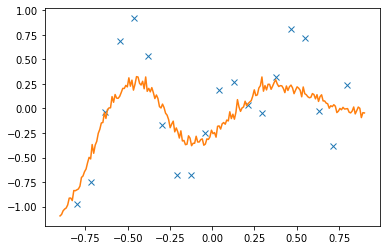

In [6]:
# Define the executor, which we want to use the qasm_simulator
# and thus we moreover set the desired number of shots
executor = Executor("qasm_simulator")
executor.set_shots(1000)

# Define the FQK instance
kernel = FidelityKernel(fmap, executor=executor, parameter_seed=0)

# define QSVR instance (procedure analogously to sklearn)
qsvr = QSVR(quantum_kernel=kernel)
qsvr.fit(x.reshape(-1, 1), y)
y_fine = qsvr.predict(x_fine.reshape(-1, 1))

# plot the results
plt.plot(x, y, "x")
plt.plot(x_fine, y_fine)

In order to improve the accuracy you can try to increase the number of shots, optimize the feature maps trainable parameters or fine-tune the classical hyper-parameters of the QSVR